In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

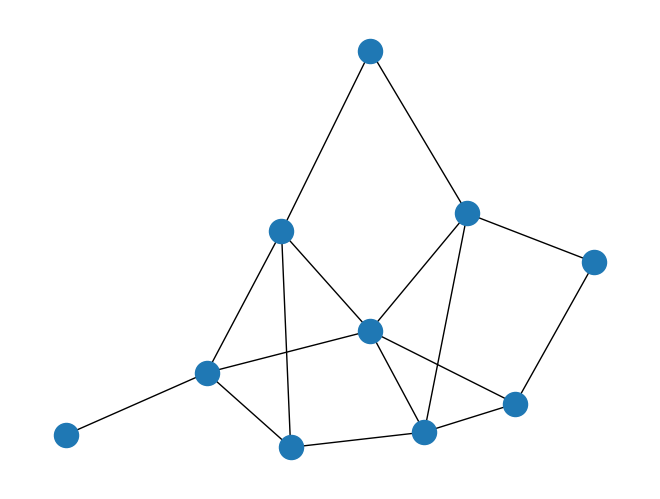

In [2]:
er_graph = nx.erdos_renyi_graph(10, 0.3)

nx.draw(er_graph)
plt.show()

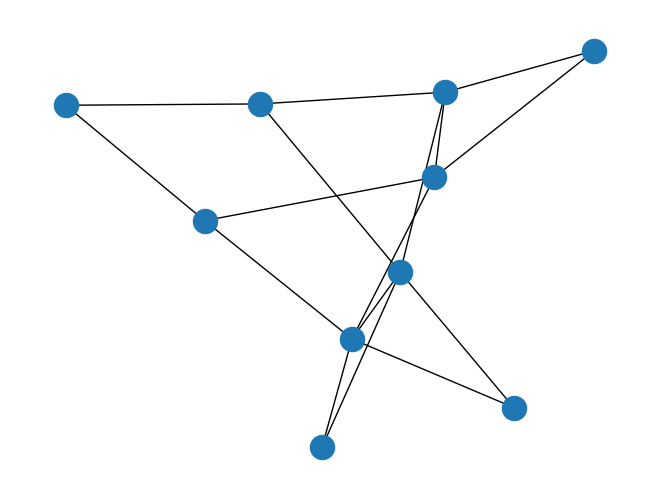

In [3]:
ba_graph = nx.barabasi_albert_graph(10, 2)

nx.draw(ba_graph)
plt.show()

#### Calculation of number of edges:

ER: (n * (n-1) / 2) * p (on average)

(10000 * 9999/2) * 1/500 = 10 * 9999 = 99990

BA: n * m (approximately)

10000 * 10 = 100000

=> With these parameters (n = 10000, p=1/500, m = 10) both algorithms have statistically a similar amount of edges (e=100000).

Number of edges:  99996


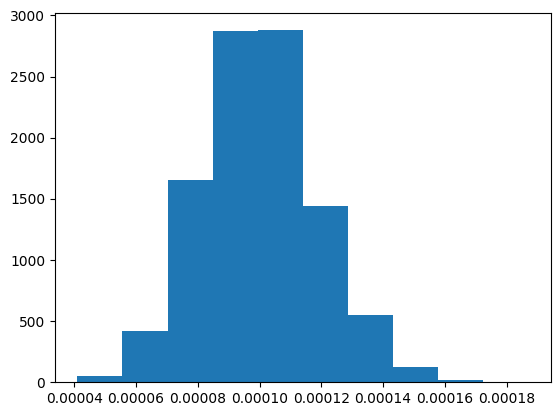

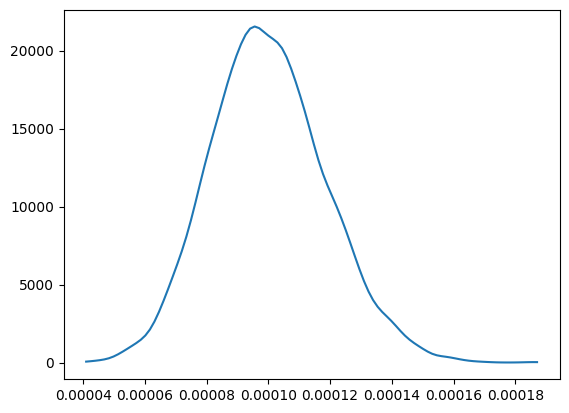

In [4]:
from scipy.stats import gaussian_kde

er_graph = nx.erdos_renyi_graph(10000, 1/500)
er_rank = np.array(list(nx.pagerank(er_graph).values()))

print("Number of edges: ", len(er_graph.edges))

plt.hist(er_rank, 10)
plt.show()

kde = gaussian_kde(er_rank)
data_space = np.linspace( min(er_rank), max(er_rank), 100 )
plt.plot(data_space, kde(data_space))
plt.show()

Number of edges:  99900


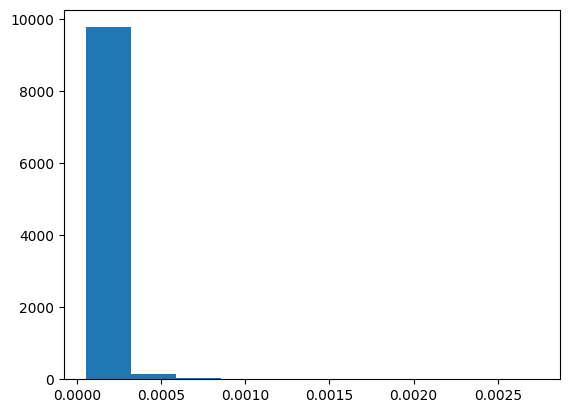

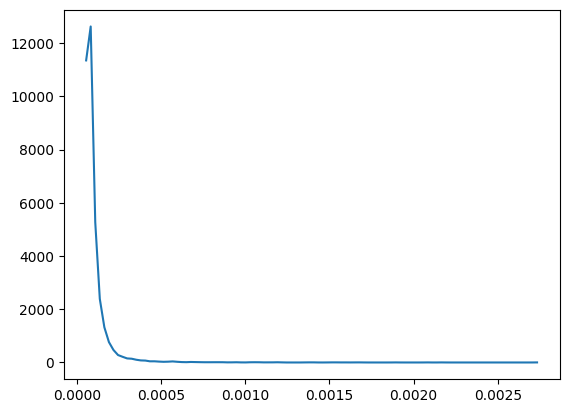

In [5]:
ba_graph = nx.barabasi_albert_graph(10000, 10)
ba_rank = np.array(list(nx.pagerank(ba_graph).values()))

print("Number of edges: ", len(ba_graph.edges))

plt.hist(ba_rank, 10)
plt.show()

kde = gaussian_kde(ba_rank)
data_space = np.linspace( min(ba_rank), max(ba_rank), 100 )
plt.plot(data_space, kde(data_space))
plt.show()

In [6]:
import scipy.stats as st

print("Sum ER:", np.sum(er_rank))
print("Sum BA:", np.sum(ba_rank))
print()
print("Mean ER:", np.mean(er_rank))
print("Mean BA:", np.mean(ba_rank))
print()
print("Std ER:", np.std(er_rank))
print("Std BA:", np.std(ba_rank))
print()
print("Skewness ER:", st.skew(er_rank))
print("Skewness BA:", st.skew(ba_rank))
print()
print("Kurtosis ER:", st.kurtosis(er_rank))
print("Kurtosis BA:", st.kurtosis(ba_rank))
print()
print("Max ER:", np.max(er_rank))
print("Max BA:", np.max(ba_rank))
print()
print("Quantile ER 0.001", np.quantile(er_rank, 0.001))
print("Quantile BA 0.001", np.quantile(ba_rank, 0.001))
print("Quantile ER 0.999", np.quantile(er_rank, 0.999))
print("Quantile BA 0.999", np.quantile(ba_rank, 0.999))
print()

higher = er_rank[er_rank > np.quantile(er_rank, 0.9)]
print("Percentage of the highest 10 percent ER:", sum(higher)/sum(er_rank))
higher = ba_rank[ba_rank > np.quantile(ba_rank, 0.9)]
print("Percentage of the highest 10 percent BA:", sum(higher)/sum(ba_rank))


Sum ER: 0.9999999999999999
Sum BA: 1.0000000000000002

Mean ER: 9.999999999999999e-05
Mean BA: 0.00010000000000000002

Std ER: 1.8595076753166123e-05
Std BA: 0.00010172488804145411

Skewness ER: 0.24707963769840605
Skewness BA: 9.550207406844907

Kurtosis ER: 0.0914563199598728
Kurtosis BA: 142.5776925766416

Max ER: 0.00018705208083072373
Max BA: 0.0027338367418034194

Quantile ER 0.001 4.904792243654968e-05
Quantile BA 0.001 5.436857745820925e-05
Quantile ER 0.999 0.0001620781095246102
Quantile BA 0.999 0.0014069293834742696

Percentage of the highest 10 percent ER: 0.13435643022281168
Percentage of the highest 10 percent BA: 0.29073267653209217


#### Interpretation

The sum of all page ranks in both models is 1.0.
Means are almost equal. This because both graphs have 10000 nodes and the page rank of 1.0 has to be distributed on these nodes.

Standard deviation of BA is significant higher. => The power law distribution is less centered to the mean.

Skewness of BA is significant higher. => The power law distribution is less symmetric.

The kurtosis of the BA distribution is multiple orders of magnitude higher. => The power law distribution is heavy tailed.

The maximum page rank of BA is significant higher. => The BA favours large hubs.
While the lower quantiles are similar in both solutions, the value of the higher quantile of BA is significant higher similar to the maximum page rank.

In BA the 10 percent nodes with the highest page_rank have 29% of the complete page rank